In [10]:
# %pip install -r ../../requirements.txt

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from pic import PIC
from evaluation import evaluate_clustering_algorithms

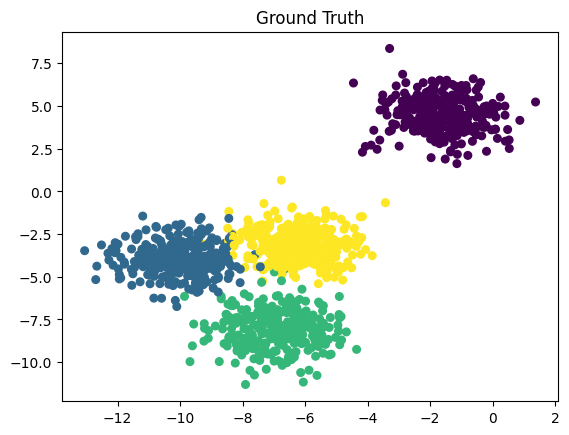

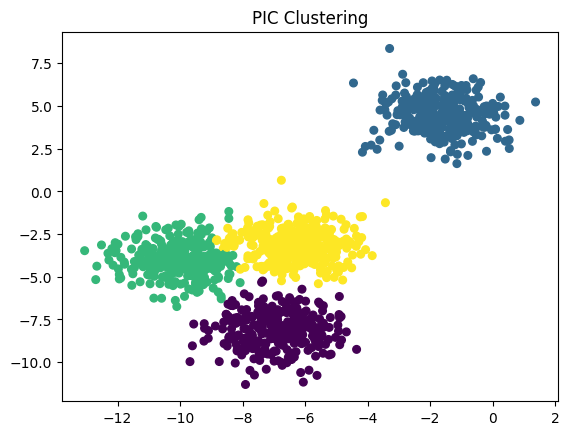

In [ ]:
# Generate synthetic data.
n_samples = 1200
n_clusters = 4
blobs, y_true = make_blobs(n_samples=n_samples, centers=n_clusters, random_state=1)
pic = PIC(n_clusters=n_clusters, k=20, a=0.95, z=0.01)
y_pred_pic = pic.fit_predict(blobs)

plt.scatter(blobs[:, 0], blobs[:, 1], c=y_true, cmap='viridis', s=30)
plt.title("Ground Truth")
plt.show()

plt.scatter(blobs[:, 0], blobs[:, 1], c=y_pred_pic, cmap='viridis', s=30)
plt.title("PIC Clustering")
plt.show()

In [5]:
results_df = evaluate_clustering_algorithms(blobs, y_true, n_clusters, y_pred_pic)
print(results_df)

PIC: NMI = 0.9363, CE = 0.0183
Running k-med...
k-med: NMI = 0.7475, CE = 0.3192
Running A-link...
A-link: NMI = 0.8290, CE = 0.2558
Running S-link...
S-link: NMI = 0.5745, CE = 0.5000
Running C-link...
C-link: NMI = 0.8980, CE = 0.0358
Running AP...


c:\Users\sanch\Desktop\MAI\Semester2\URL\mai-url\.venv\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
c:\Users\sanch\Desktop\MAI\Semester2\URL\mai-url\.venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


AP: NMI = 0.5449, CE = 0.7683
Running NCuts...
NCuts: NMI = 0.9473, CE = 0.0142
Running NJW...
NJW: NMI = 0.9497, CE = 0.0133
Running CT...
CT: NMI = 0.8821, CE = 0.0383
Running Zell...
Zell: NMI = 0.9355, CE = 0.0192
Running C-kernel...
C-kernel: NMI = 0.9343, CE = 0.0192
Running D-kernel...
D-kernel: NMI = 0.9305, CE = 0.0208
   Algorithm       NMI        CE
0        PIC  0.936299  0.018333
1      k-med  0.747502  0.319167
2     A-link  0.829005  0.255833
3     S-link  0.574537  0.500000
4     C-link  0.897990  0.035833
5         AP  0.544909  0.768333
6      NCuts  0.947311  0.014167
7        NJW  0.949702  0.013333
8         CT  0.882135  0.038333
9       Zell  0.935453  0.019167
10  C-kernel  0.934329  0.019167
11  D-kernel  0.930476  0.020833
